# 🇩🇪 German Coalition Agreement Word Cloud Project
This project explores the 2025 German coalition agreement using NLP techniques to extract meaningful patterns and visualize them using a thematic word cloud.


## 🔍 Project Workflow
1. Load and extract text from the PDF
2. Preprocess the text (lemmatization, stopword removal)
3. Count the most frequent terms
4. Generate a word cloud using a Germany-shaped mask


In [ ]:
import PyPDF2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import spacy
import numpy as np
from PIL import Image

## 📄 Step 1: Extract Text from PDF

In [ ]:
pdf_path = '/Users/khalilhammod/Downloads/Python/Koalitionsvertrag-2025.pdf'
with open(pdf_path, 'rb') as pdfFileObj:
    pdfReader = PyPDF2.PdfReader(pdfFileObj)
    txt = ''.join([page.extract_text() for page in pdfReader.pages])

## 🧹 Step 2: Preprocessing and Lemmatization

In [ ]:
 def preprocess_text(text):
    nlp = spacy.load("de_core_news_sm")
    doc = nlp(text)
    stop_words = set(stopwords.words("german"))
    custom_stopwords = [
   'sowie', 'müssen', 'insbesondere', 'dazu', 'weiteren',
   'werden', 'können', 'soll', 'sollen', 'unserer', 'mehr', 'ab',
   'dafür', 'dabei', 'deshalb', 'beispiel', 'weitere', 'beim',
   'ebene', 'besser', 'jahr', 'rahmen', 'gelten', 'bereich', 'weiterhin', 'wichtig', 'land', 'setzen' 
]
    spacy_stopwords = nlp.Defaults.stop_words
    all_stopwords = spacy_stopwords.union(stop_words).union(custom_stopwords)

    lemmas = [
        token.lemma_.lower() for token in doc
        if token.is_alpha and token.lemma_.lower() not in all_stopwords and len(token.lemma_) > 3
    ]
    return lemmas

In [ ]:
r_lemmas = preprocess_text(txt)

## 📊 Step 3: Frequency Distribution

In [ ]:
lemma_freq = FreqDist(r_lemmas)
top_50 = dict(lemma_freq.most_common(50)) 

## 🎨 Step 4: Word Cloud Generation

In [ ]:
mask = np.array(Image.open("g.png"))

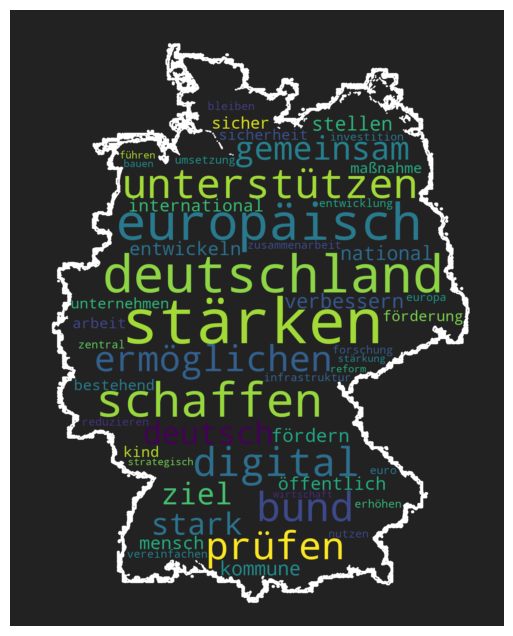

In [ ]:
wordcloud = WordCloud( background_color="#222222", colormap="viridis", mask=mask, prefer_horizontal=1.0, contour_color='white', contour_width=6).generate_from_frequencies(top_50)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 📊 Final Output
The word cloud below visually represents the 50 most common lemmatized terms found in the agreement.
